<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/03Clustering/02ClusteringGerarchico/gerarchico01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Gerarchico
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd

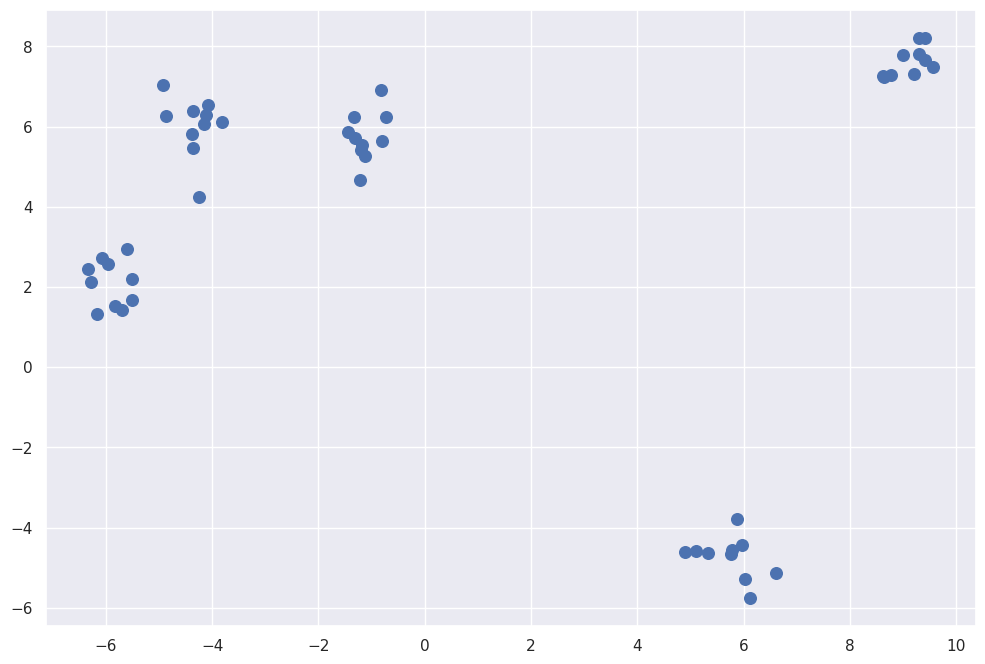

In [2]:
# preparo la visualizzazione
plt.rcParams["figure.figsize"] = (12, 8)
sns.set()

# creo un dataset random, ignoro il target
X, _ = make_blobs(n_samples=50, centers=5, cluster_std=0.5, random_state=1234)

# visualizzo il dataset così creato
plt.scatter(X[:, 0], X[:, 1], s=70)

In [3]:
# costruisco una matrice di associazioni (linkage), usando il Ward's linkage
# che è una versione "macchina" del dendrogramma
link_matrix = linkage(X, method="ward")

# visualizzo la matrice di linkage
# imposto il nome delle colonne per chiarire i valori che contengono
pd_lnk_mtx = pd.DataFrame(link_matrix, columns=["cluster ID_A", "cluster ID_B", "distanza", "numero dati"])
pd_lnk_mtx

,cluster ID_A,cluster ID_B,distanza,numero dati
0,0.0,49.0,0.041826,2.0
1,6.0,7.0,0.089505,2.0
2,28.0,35.0,0.107674,2.0
3,17.0,25.0,0.124217,2.0
4,44.0,50.0,0.161144,3.0
5,3.0,24.0,0.169438,2.0
6,16.0,29.0,0.172384,2.0
7,11.0,21.0,0.176212,2.0
8,31.0,48.0,0.206156,2.0
9,13.0,33.0,0.214414,2.0


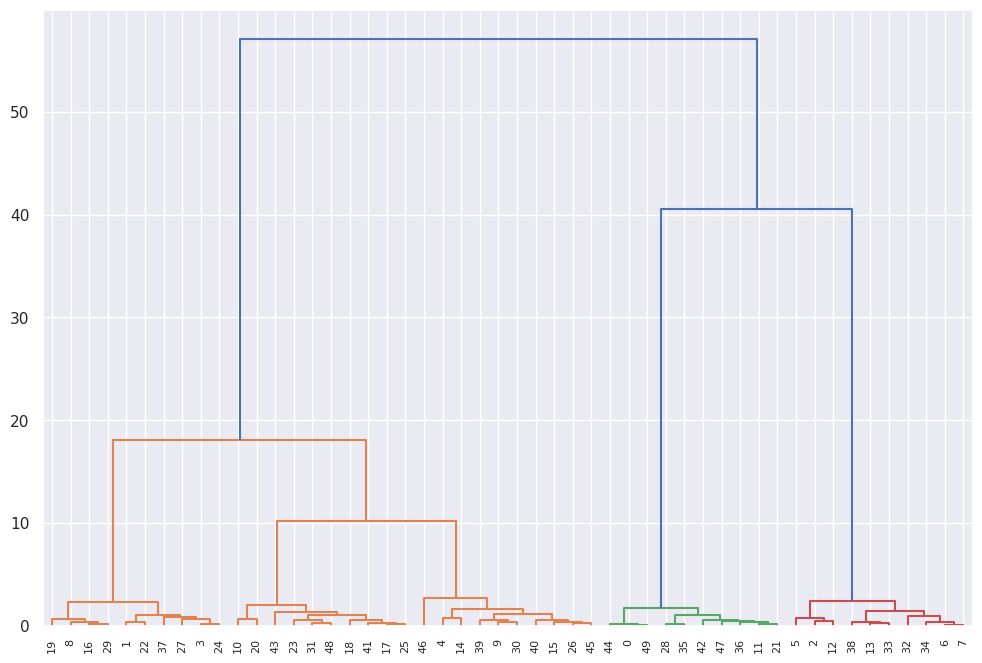

In [4]:
# visualizzo il dendrogramma
dendrogram(link_matrix)
plt.show()

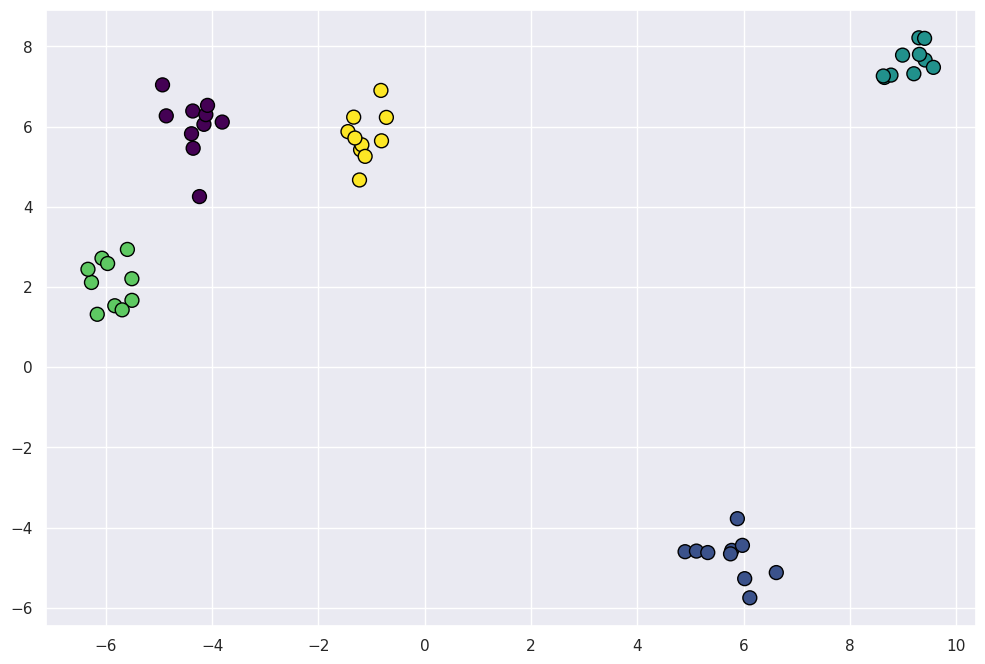

In [5]:
# ora che ho idea della soglia da utilizzare, posso creare il modello di clustering agglomerativo
# NOTA: in SciKitLearn è necessario indicare subito il numero di cluster, quindi si va a perdere
# l'utilità del dendrogramma...
agglom_clustering = AgglomerativeClustering(n_clusters=5, linkage="ward")
# in un unico passaggio addestro il modello ed elaboto la predizione
y = agglom_clustering.fit_predict(X)

# visualizzo la clusterizzazione ottenuta
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="viridis", edgecolors="black")